In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

sns.set(style="darkgrid")

In [3]:
train = pd.read_csv("train.csv")
example = pd.read_excel('example.xlsx', engine='openpyxl')
counterparitys = pd.read_csv("Контрагенты по годам.csv")
buys = pd.read_csv("Покупка с ОРЭ 2019-2020.csv")
tariffs = pd.read_csv("Тарифы 2019-2020.csv")

In [11]:
buys

,МОЩНОСТЬ,Рынок на сутки вперед (РСВ),Электроэнергия по РД,Балансирующий рынок (покупка),"УСЛУГИ АТС ,ЦФР и СО",Балансирующий рынок (продажа),РСВ (продажа),"Объем потребления, кВтч",Год,Месяц
0,"27 856 722,58","1 172 518,28","58 229 338,75","1 909 600,13","314 082,63","-659 523,88","-1 940 955,58",88 893 306,2019,1
1,"29 457 544,09","1 911 608,62","52 686 114,39","556 880,95","291 290,45","-1 161 772,16","-1 015 795,65",80 434 679,2019,2
2,"25 593 528,14","3 215 261,09","55 539 440,25","1 402 873,12","294 727,11","-1 293 039,25","-920 066,19",88 807 657,2019,3
3,"23 551 519,85","2 205 103,25","61 070 046,69","1 033 544,97","300 954,41","-1 437 984,18","-808 853,32",84 527 764,2019,4
4,"29 414 538,66","850 226,55","49 283 304,69","681 313,19","300 896,36","-921 031,93","-816 597,24",85 367 082,2019,5
5,"37 859 866,41","3 353 289,44","38 342 316,24","527 428,17","285 383,11","-1 363 819,19","-131 499,59",78 828 608,2019,6
6,"38 604 023,26","122 961,08","50 087 799,89","611 410,09","286 042,67","-481 171,66","-3 247 801,80",78 674 192,2019,7
7,"23 489 485,75","481 064,29","51 563 822,94","1 254 386,37","279 475,77","-437 827,85","-4 147 336,64",78 213 113,2019,8
8,"42 719 142,15","1 656 485,53","59 708 384,45","321 812,64","286 189,99","-1 230 707,73","-1 789 848,42",79 340 135,2019,9
9,"26 485 502,21","2 572 091,17","55 200 341,80","1 454 225,38","294 599,11","-454 188,50","-2 121 155,65",86 017 087,2019,10


In [114]:
a = pd.DataFrame(counterparitys.isnull().sum())
a_nan = a[a[0] != 0]

#Есть пропуски в дата докум.3 и Дата постановки на оплату (оконч. платеж.)
a_nan_over_10 = a_nan[a_nan[0] > 10]

#Удаляем Дата постановки на оплату (оконч. платеж.), оч много пропусков
counterparitys_1 = counterparitys.drop(columns='Дата постановки на оплату (оконч. платеж.)')
counterparitys_1

,"сумма док.,без НДС",% оплаты,"сумма оплачено,без НДС","сумма оплачено,с НДС",дата докум.,Дата закр. Аванса,Дата постановки на оплату (аванс),"сумма док.,без НДС2","сумма док.,с НДС",дата докум.3,"сумма к оплате с учетом аванса,без НДС","сумма к оплате с учетом аванса,с НДС",Контрагент
0,8.589579e+05,70.000000,6.012706e+05,7.094993e+05,2015-01-10,2015-02-25 00:00:00,2015-01-28 00:00:00,1.401091e+06,1.653287e+06,2015-01-31 00:00:00,7.998204e+05,9.437881e+05,3
1,1.494709e+06,65.681947,9.817540e+05,1.158470e+06,2015-01-01,2015-02-25 00:00:00,2015-02-11 00:00:00,1.342357e+06,1.583982e+06,2015-03-19 00:00:00,3.606033e+05,4.255119e+05,1
2,3.399202e+07,50.000000,1.699601e+07,2.005529e+07,2014-12-19,2015-02-25 00:00:00,2015-01-21 00:00:00,3.481920e+07,4.108665e+07,2015-01-31 00:00:00,1.782318e+07,2.103136e+07,2
3,6.727360e+06,50.000000,3.363680e+06,3.969142e+06,2014-12-19,2015-02-25 00:00:00,2015-01-21 00:00:00,7.850059e+06,9.263069e+06,2015-01-31 00:00:00,4.486379e+06,5.293927e+06,2
4,1.638478e+07,100.000000,1.638478e+07,1.933405e+07,2015-01-12,2015-02-26 00:00:00,2015-01-13 00:00:00,4.785992e+07,5.647471e+07,2015-01-31 00:00:00,1.509036e+07,1.780662e+07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,4.076424e+07,50.000000,2.038212e+07,2.445854e+07,2021-02-19,2021-04-30 00:00:00,2021-03-10 00:00:00,0.000000e+00,0.000000e+00,NaN,-2.038212e+07,-2.445854e+07,2
476,9.121529e+06,50.000000,4.560764e+06,5.472917e+06,2021-02-19,2021-04-30 00:00:00,2021-03-10 00:00:00,0.000000e+00,0.000000e+00,NaN,-4.560764e+06,-5.472917e+06,2
477,2.586886e+07,100.000000,2.586886e+07,3.104263e+07,2021-02-25,2021-03-31 00:00:00,2021-03-10 00:00:00,0.000000e+00,0.000000e+00,NaN,-5.173772e+07,-6.208527e+07,4
478,2.586886e+07,100.000000,2.586886e+07,3.104263e+07,2021-02-25,2021-03-31 00:00:00,2021-03-17 00:00:00,0.000000e+00,0.000000e+00,NaN,-5.173772e+07,-6.208527e+07,4


In [120]:
# дропнули дубли
counterparitys_1 = counterparitys_1.drop_duplicates(subset=['% оплаты', 'сумма оплачено,без НДС', 'Контрагент'], keep='last')
counterparitys_1

,"сумма док.,без НДС",% оплаты,"сумма оплачено,без НДС","сумма оплачено,с НДС",дата докум.,Дата закр. Аванса,Дата постановки на оплату (аванс),"сумма док.,без НДС2","сумма док.,с НДС",дата докум.3,"сумма к оплате с учетом аванса,без НДС","сумма к оплате с учетом аванса,с НДС",Контрагент
0,8.589579e+05,70.000000,6.012706e+05,7.094993e+05,2015-01-10,2015-02-25 00:00:00,2015-01-28 00:00:00,1.401091e+06,1.653287e+06,2015-01-31 00:00:00,7.998204e+05,9.437881e+05,3
1,1.494709e+06,65.681947,9.817540e+05,1.158470e+06,2015-01-01,2015-02-25 00:00:00,2015-02-11 00:00:00,1.342357e+06,1.583982e+06,2015-03-19 00:00:00,3.606033e+05,4.255119e+05,1
2,3.399202e+07,50.000000,1.699601e+07,2.005529e+07,2014-12-19,2015-02-25 00:00:00,2015-01-21 00:00:00,3.481920e+07,4.108665e+07,2015-01-31 00:00:00,1.782318e+07,2.103136e+07,2
3,6.727360e+06,50.000000,3.363680e+06,3.969142e+06,2014-12-19,2015-02-25 00:00:00,2015-01-21 00:00:00,7.850059e+06,9.263069e+06,2015-01-31 00:00:00,4.486379e+06,5.293927e+06,2
5,1.638478e+07,100.000000,1.638478e+07,1.933405e+07,2015-01-13,2015-02-26 00:00:00,2015-01-13 00:00:00,4.853702e+07,5.727369e+07,2015-02-17 00:00:00,1.576745e+07,1.860560e+07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,1.572466e+06,50.000000,7.862332e+05,9.434799e+05,2021-02-25,2021-04-30 00:00:00,2021-03-10 00:00:00,0.000000e+00,0.000000e+00,NaN,-7.862332e+05,-9.434799e+05,1
475,4.076424e+07,50.000000,2.038212e+07,2.445854e+07,2021-02-19,2021-04-30 00:00:00,2021-03-10 00:00:00,0.000000e+00,0.000000e+00,NaN,-2.038212e+07,-2.445854e+07,2
476,9.121529e+06,50.000000,4.560764e+06,5.472917e+06,2021-02-19,2021-04-30 00:00:00,2021-03-10 00:00:00,0.000000e+00,0.000000e+00,NaN,-4.560764e+06,-5.472917e+06,2
478,2.586886e+07,100.000000,2.586886e+07,3.104263e+07,2021-02-25,2021-03-31 00:00:00,2021-03-17 00:00:00,0.000000e+00,0.000000e+00,NaN,-5.173772e+07,-6.208527e+07,4


In [75]:
counterparitys['Контрагент'].unique()

array([3, 1, 2, 4, 5])

In [58]:
train.describe()[['Сумма в RUB']]

,Сумма в RUB
count,1.579000e+03
mean,-5.321623e+07
std,1.330521e+08
min,-1.202323e+09
25%,-2.630934e+07
50%,-8.198127e+06
75%,-9.494094e+05
max,-1.949045e+00


In [27]:
m = Prophet()
m.fit(train_pr)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1160,2021-12-26
1161,2021-12-27
1162,2021-12-28
1163,2021-12-29
1164,2021-12-30


In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1160,2021-12-26,-2.645254e+08,-3.897054e+08,-1.326340e+08
1161,2021-12-27,-6.376826e+07,-2.043942e+08,6.596918e+07
1162,2021-12-28,-2.991583e+08,-4.272294e+08,-1.736661e+08
1163,2021-12-29,-5.732787e+07,-1.832033e+08,6.848128e+07
1164,2021-12-30,-7.298524e+07,-2.018022e+08,6.284298e+07


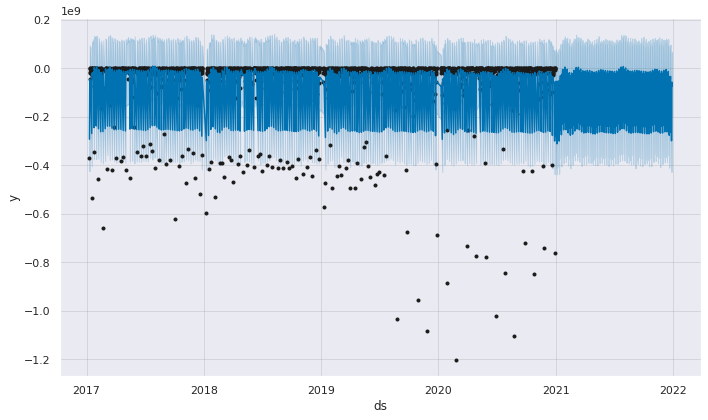

In [33]:
fig1 = m.plot(forecast)

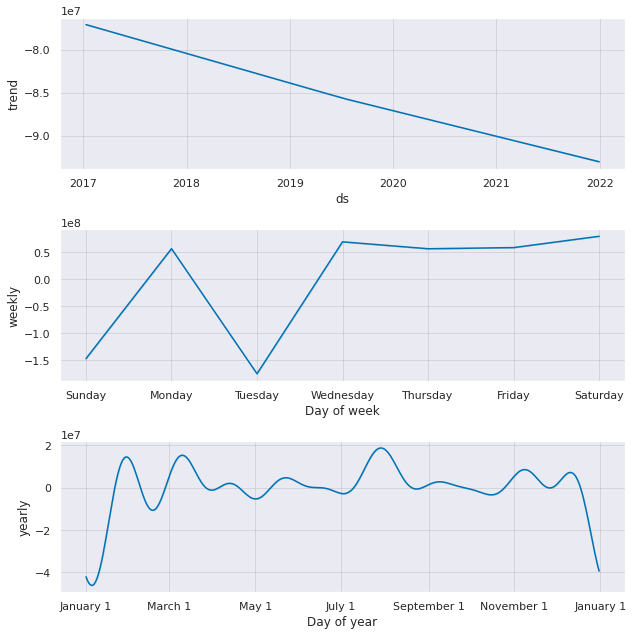

In [34]:
fig2 = m.plot_components(forecast)

In [132]:
l = [2,4,1,2,4,2,4,36,7]

for k in range(0,len(l)-1):
    if l[k] > l[k+1]:
        l[k+1], l[k] = l[k], l[k+1]
print(l)

[2, 1, 2, 4, 2, 4, 4, 7, 36]


In [73]:
def ins_sort(A):
    for i in range(1,len(A)):
        for j in range(i-1, -1, -1):
            if A[j] > A[j+1]:
                A[j], A[j+1] = A[j+1], A[j]
            else:
                break
                

def ins_sort_while(A):
    for i in range(1, len(A)):
        j = i - 1
        while A[j] > A[j+1] and j >= 0:
            A[j], A[j+1] = A[j+1], A[j]
            j -= 1

In [75]:
B = [2,4,34,3,2,0]
ins_sort_while(B)
B

[0, 2, 2, 3, 4, 34]